# *1. Assign directories*

In [1]:
import os
import numpy as np
import pandas as pd

# Assign training and validation set directories
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Assign directories with training pictures 
train_normal = os.path.join(train_dir, 'NORMAL')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA')


# Assign directories with test pictures
test_normal = os.path.join(test_dir, 'NORMAL')
test_pneumonia = os.path.join(test_dir, 'PNEUMONIA')

# Assign directories with validation pictures
val_normal = os.path.join(val_dir, 'NORMAL')
val_pneumonia = os.path.join(val_dir, 'PNEUMONIA')

In [2]:
# Total number of pictures in training directory
train_normal_files = os.listdir(train_normal)
train_pneumonia_files = os.listdir(train_pneumonia)

# Total number of pictures in testing directory
test_normal_files = os.listdir(test_normal)
test_pneumonia_files = os.listdir(test_pneumonia)

# Total number of pictures in validation directory
val_normal_files = os.listdir(val_normal)
val_pneumonia_files = os.listdir(val_pneumonia)

print('-Total training images- \n',
      'Normal: ', len(train_normal_files), '\n',
      'Pneumonia: ', len(train_pneumonia_files), '\n',
      '',
      '-Total testing images- \n',
      'Normal: ', len(test_normal_files), '\n',
      'Pneumonia: ', len(test_pneumonia_files), '\n',
      '',
      '-Total validation images- \n',
      'Normal: ', len(val_normal_files), '\n',
      'Pneumonia: ', len(val_pneumonia_files), '\n')

-Total training images- 
 Normal:  1341 
 Pneumonia:  3875 
  -Total testing images- 
 Normal:  234 
 Pneumonia:  390 
  -Total validation images- 
 Normal:  8 
 Pneumonia:  8 



In [3]:
# Check the filename of the files
print('-File name of training images- \n',
      'Normal: \n', train_normal_files[:5], '\n',
      'Pneumonia: \n', train_pneumonia_files[:5], '\n',
      '',
      '-File name of testing images- \n',
      'Normal: \n', test_normal_files[:5], '\n',
      'Pneumonia: \n', test_pneumonia_files[:5], '\n',
      '',
      '-File name of validation images- \n',
      'Normal: \n', val_normal_files[:5], '\n',
      'Pneumonia: \n', val_pneumonia_files[:5], '\n')

-File name of training images- 
 Normal: 
 ['NORMAL2-IM-0771-0001.jpeg', 'NORMAL2-IM-1294-0001-0002.jpeg', 'IM-0675-0001.jpeg', 'NORMAL2-IM-1169-0001.jpeg', 'IM-0421-0001.jpeg'] 
 Pneumonia: 
 ['person1180_virus_2010.jpeg', 'person1230_virus_2081.jpeg', 'person1513_virus_2632.jpeg', 'person124_virus_238.jpeg', 'person746_virus_1369.jpeg'] 
  -File name of testing images- 
 Normal: 
 ['NORMAL2-IM-0336-0001.jpeg', 'IM-0101-0001.jpeg', 'NORMAL2-IM-0337-0001.jpeg', 'NORMAL2-IM-0198-0001.jpeg', 'IM-0013-0001.jpeg'] 
 Pneumonia: 
 ['person1676_virus_2892.jpeg', 'person1650_virus_2852.jpeg', 'person22_virus_55.jpeg', 'person122_bacteria_582.jpeg', 'person85_bacteria_417.jpeg'] 
  -File name of validation images- 
 Normal: 
 ['NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg'] 
 Pneumonia: 
 ['person1947_bacteria_4876.jpeg', 'person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1954_

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Show random 9 images from specific category.
def plot_images(category):
    category_path = globals()['train_' + category]
    filename = globals()['train_' + category + '_files']

    random_images = random.sample(filename, 9)

    nrows = 3
    ncols = 3
    fig, axes = plt.subplots(nrows, ncols, figsize = (6, 6))
    
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(category_path, img_file) 
        img = mpimg.imread(img_path)
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('off')
        plt.imshow(img)
        
    fig.suptitle(category + ' images')    
    plt.tight_layout()
    plt.show()

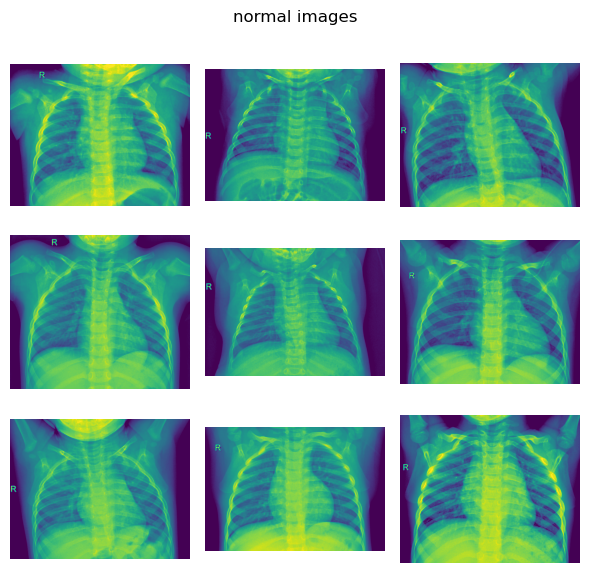

In [5]:
plot_images('normal')

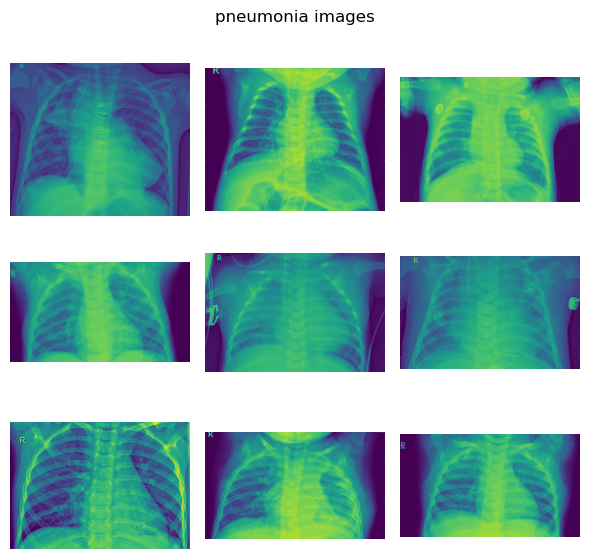

In [6]:
plot_images('pneumonia')

# *2. Data processing*

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define generator and argmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=(0.9, 1.1),
    vertical_flip=False,
    horizontal_flip=False,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
# Parameters
img_size = 250
batch_size = 64
seed = 42

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=seed)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=seed)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=seed)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
from sklearn.utils import class_weight

# Using the weights of classes to improve unbalancing categories
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator.classes), y= train_generator.classes)
class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

# *3. Train the model*

In [10]:
# Define the evaluation function
def plot_acc_loss():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'r', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

### 3.1 CNN networks

### 3.2 Transfer learning InceptionV3

### 3.2.1 Without pre-trained weights

In [11]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers, models, optimizers, Model
from tensorflow.keras.applications import InceptionV3

# Transfer learning InceptionV3
pre_trained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze all layers in pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add dense layers
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22,852,385
Trainable params: 1,049,601
Non-

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback functions
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.001, patience=5)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True)

In [13]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

EPOCHS = 20
# Train the model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/20
81/81 [==============================] - 525s 6s/step - loss: 1.1395 - accuracy: 0.8503 - val_loss: 1.2518 - val_accuracy: 0.7882 - lr: 1.0000e-04
Epoch 2/20
81/81 [==============================] - 508s 6s/step - loss: 0.9913 - accuracy: 0.9047 - val_loss: 1.1257 - val_accuracy: 0.8316 - lr: 1.0000e-04
Epoch 3/20
81/81 [==============================] - 505s 6s/step - loss: 0.9264 - accuracy: 0.9187 - val_loss: 1.2388 - val_accuracy: 0.7917 - lr: 1.0000e-04
Epoch 4/20
81/81 [==============================] - 507s 6s/step - loss: 0.8730 - accuracy: 0.9297 - val_loss: 1.1330 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 4: early stopping


1/1 [==============================] - 1s 1s/step - loss: 0.9398 - accuracy: 0.9375
Validation Loss: 0.9398168325424194
Validation Accuracy: 0.9375


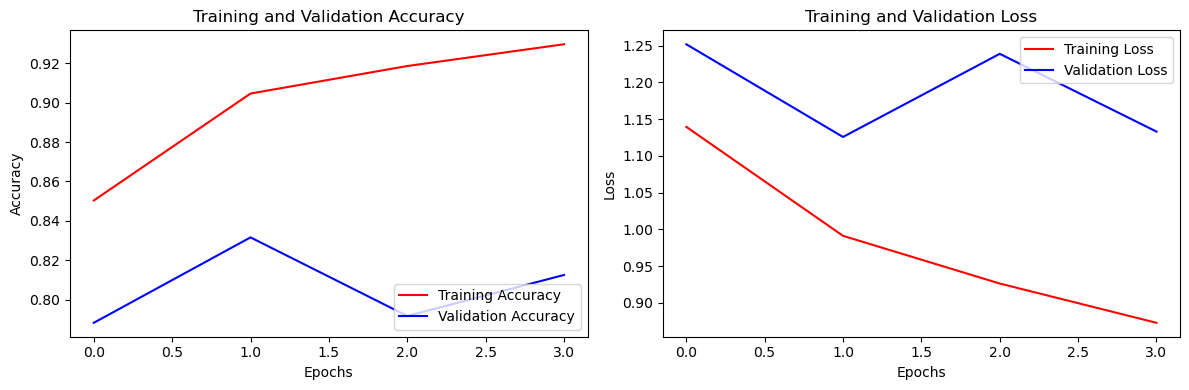

In [14]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
plot_acc_loss()

### 3.2.1 With pre-trained weights

In [15]:
# Transfer learning InceptionV3
pre_trained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Applying pretrained weight
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
-O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model.load_weights(local_weights_file)

# Freeze all layers in pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add dense layers
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

--2023-06-30 05:10:46--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 74.125.134.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   189MB/s    in 0.4s    

2023-06-30 05:10:47 (189 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 gl

In [16]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

EPOCHS = 20
# Train the model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/20
81/81 [==============================] - 511s 6s/step - loss: 1.1078 - accuracy: 0.8645 - val_loss: 1.1811 - val_accuracy: 0.8247 - lr: 1.0000e-04
Epoch 2/20
81/81 [==============================] - 508s 6s/step - loss: 0.9833 - accuracy: 0.9061 - val_loss: 1.1317 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 3/20
81/81 [==============================] - 466s 6s/step - loss: 0.9101 - accuracy: 0.9220 - val_loss: 1.0961 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 4/20
81/81 [==============================] - 468s 6s/step - loss: 0.8681 - accuracy: 0.9268 - val_loss: 1.0464 - val_accuracy: 0.8316 - lr: 1.0000e-04
Epoch 5/20
81/81 [==============================] - 506s 6s/step - loss: 0.8267 - accuracy: 0.9340 - val_loss: 0.9724 - val_accuracy: 0.8559 - lr: 1.0000e-04
Epoch 6/20
81/81 [==============================] - 507s 6s/step - loss: 0.7767 - accuracy: 0.9396 - val_loss: 0.9866 - val_accuracy: 0.8351 - lr: 1.0000e-04
Epoch 7/20
81/81 [==============================] - 

1/1 [==============================] - 1s 1s/step - loss: 0.7780 - accuracy: 0.9375
Validation Loss: 0.7780348658561707
Validation Accuracy: 0.9375


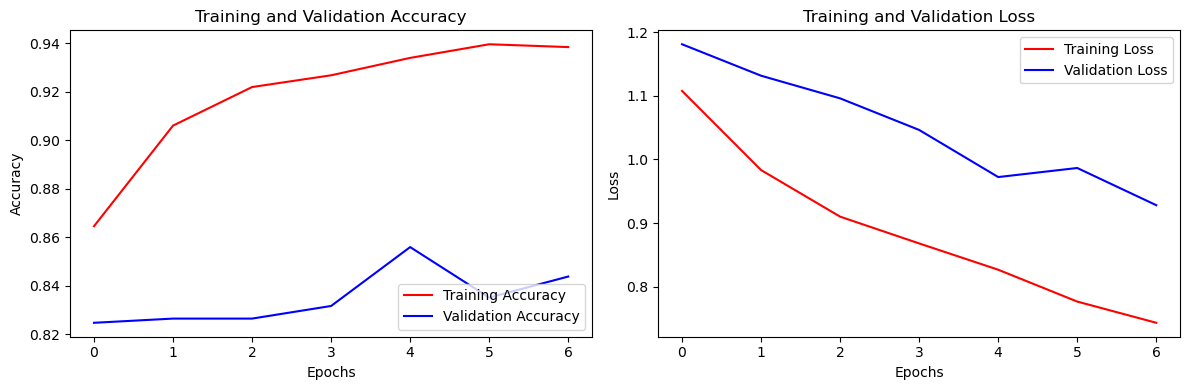

In [17]:
weights_val_loss, weights_val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", weights_val_loss)
print("Validation Accuracy:", weights_val_accuracy)
plot_acc_loss()

### 3.2.3 Using specific layer as ouput layer

In [18]:
# Transfer learning InceptionV3
pre_trained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze all layers in pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Get the mixed7 layer
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

# Add layers
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 124, 124, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 124, 124, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                             

In [19]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

EPOCHS = 20
# Train the model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/20
81/81 [==============================] - 432s 5s/step - loss: 5.8025 - accuracy: 0.7473 - val_loss: 4.9768 - val_accuracy: 0.7830 - lr: 1.0000e-04
Epoch 2/20
81/81 [==============================] - 423s 5s/step - loss: 4.2559 - accuracy: 0.8556 - val_loss: 3.6532 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 3/20
81/81 [==============================] - 420s 5s/step - loss: 3.0649 - accuracy: 0.8837 - val_loss: 2.6574 - val_accuracy: 0.7726 - lr: 1.0000e-04
Epoch 3: early stopping


1/1 [==============================] - 1s 1s/step - loss: 4.9641 - accuracy: 0.9375
Validation Loss: 4.964127540588379
Validation Accuracy: 0.9375


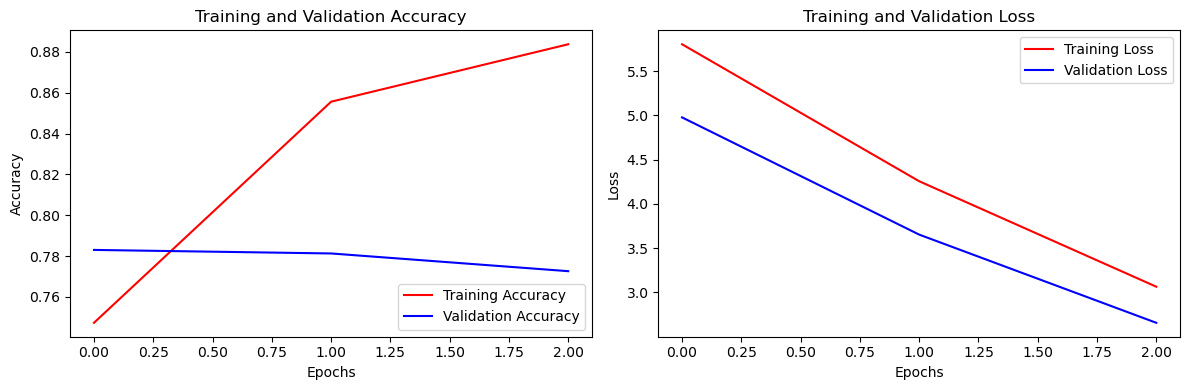

In [20]:
mixed7_val_loss, mixed7_val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", mixed7_val_loss)
print("Validation Accuracy:", mixed7_val_accuracy)
plot_acc_loss()

### 3.2.4 Funn-tuning

In [21]:
# Unfreeze layers
unfreeze_layers = 20
for layer in model.layers[-unfreeze_layers:]:
    layer.trainable = True

# Fine-tuning training
EPOCHS = 20
fine_tune_epochs = 10
total_epochs = EPOCHS + fine_tune_epochs

history = model.fit(train_generator,
                    epochs=total_epochs,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/30
81/81 [==============================] - 423s 5s/step - loss: 4.2188 - accuracy: 0.8643 - val_loss: 3.6219 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 2/30
81/81 [==============================] - 426s 5s/step - loss: 3.0281 - accuracy: 0.8820 - val_loss: 2.6049 - val_accuracy: 0.7899 - lr: 1.0000e-04
Epoch 3/30
81/81 [==============================] - 425s 5s/step - loss: 2.1463 - accuracy: 0.8876 - val_loss: 1.8751 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 3: early stopping


1/1 [==============================] - 1s 1s/step - loss: 3.5892 - accuracy: 0.9375
Validation Loss: 3.589240074157715
Validation Accuracy: 0.9375


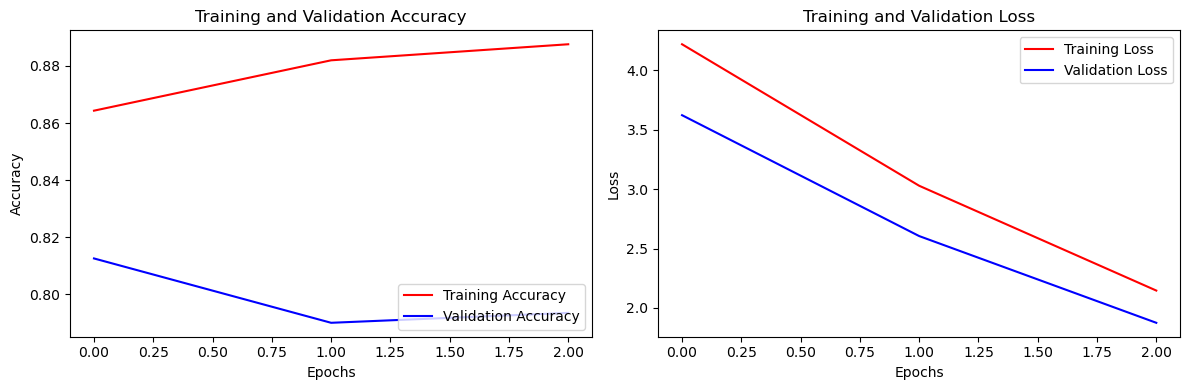

In [22]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
plot_acc_loss()